In [1]:
from google.colab import files
uploaded = files.upload()

Saving datasets1603947951084.zip to datasets1603947951084.zip


In [3]:
import zipfile
import os

zip_path = 'datasets1603947951084.zip'  # Uploaded file
extract_dir = 'dataset_folder'          # Target folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", os.path.abspath(extract_dir))

Files extracted to: /content/dataset_folder


In [6]:
import os

for root, dirs, files in os.walk('dataset_folder'):
    for file in files:
        print(os.path.join(root, file))


dataset_folder/datasets/mnist/train.csv
dataset_folder/datasets/mnist/test.csv


In [7]:
import pandas as pd

# Paths to your dataset files
train_path = 'dataset_folder/datasets/mnist/train.csv'
test_path = 'dataset_folder/datasets/mnist/test.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preview the data
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())


Train Data:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test Data:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [9]:
mnist_train = pd.read_csv('dataset_folder/datasets/mnist/train.csv')
mnist_test = pd.read_csv('dataset_folder/datasets/mnist/test.csv')

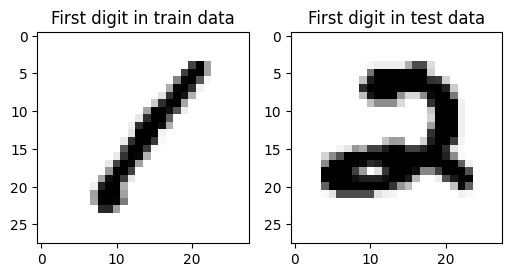

In [10]:
train_data_digit1 = np.asarray(mnist_train.iloc[0:1, 1:]).reshape(28, 28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1, ]).reshape(28, 28)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.imshow(train_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in train data")

plt.subplot(1, 2, 2)
plt.imshow(test_data_digit1, cmap=plt.cm.gray_r)
plt.title("First digit in test data")
plt.show()

In [11]:
X_train = mnist_train.iloc[:, 1:]
Y_train = mnist_train.iloc[:, 0]

In [12]:
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, solver='adam', random_state=42)
nn_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, random_state=42)

In [13]:
print("Predicted digit:", nn_model.predict(mnist_test.iloc[0:1, :])[0])

Predicted digit: 2


In [14]:
predicted_digit = nn_model.predict(X_train)
print(classification_report(Y_train, predicted_digit))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4132
           1       0.99      0.99      0.99      4684
           2       0.97      0.96      0.96      4177
           3       0.96      0.95      0.95      4351
           4       0.98      0.96      0.97      4072
           5       0.98      0.95      0.97      3795
           6       0.99      0.97      0.98      4137
           7       0.97      0.97      0.97      4401
           8       0.89      0.97      0.93      4063
           9       0.94      0.95      0.94      4188

    accuracy                           0.96     42000
   macro avg       0.96      0.96      0.96     42000
weighted avg       0.96      0.96      0.96     42000



In [15]:
test_predictions = nn_model.predict(mnist_test)
output_df = pd.DataFrame({'Predicted': test_predictions})
output_df.to_csv('mnist_test_predictions.csv', index=False)


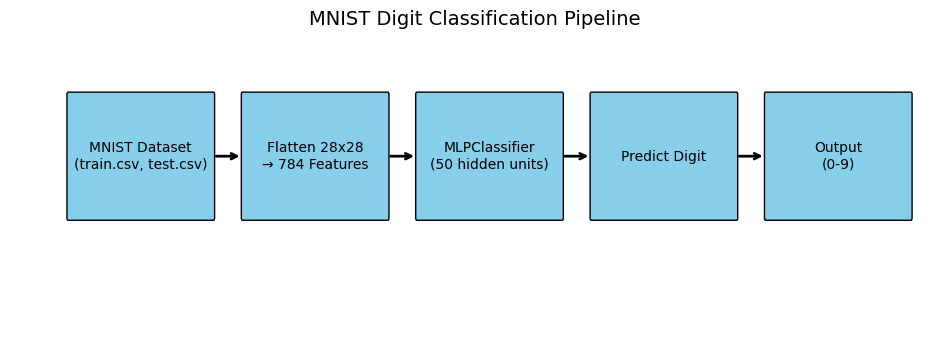

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 4))

# Function to draw boxes
def draw_box(text, xy, width=2.5, height=1):
    rect = patches.FancyBboxPatch(xy, width, height, boxstyle="round,pad=0.02", edgecolor='black', facecolor='skyblue')
    ax.add_patch(rect)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text, ha='center', va='center', fontsize=10)

# Draw each step in the pipeline
steps = [
    ("MNIST Dataset\n(train.csv, test.csv)", (0, 1.5)),
    ("Flatten 28x28\n→ 784 Features", (3, 1.5)),
    ("MLPClassifier\n(50 hidden units)", (6, 1.5)),
    ("Predict Digit", (9, 1.5)),
    ("Output\n(0-9)", (12, 1.5))
]

# Draw boxes
for text, xy in steps:
    draw_box(text, xy)

# Draw arrows
for i in range(len(steps) - 1):
    start = steps[i][1]
    end = steps[i+1][1]
    ax.annotate('', xy=(end[0], end[1]+0.5), xytext=(start[0]+2.5, start[1]+0.5),
                arrowprops=dict(arrowstyle="->", lw=2))

ax.set_xlim(-1, 15)
ax.set_ylim(0.5, 3)
ax.axis('off')
plt.title("MNIST Digit Classification Pipeline", fontsize=14)
plt.show()

In [17]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


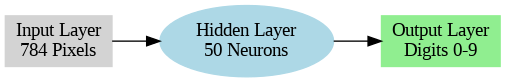

In [18]:
from graphviz import Digraph

dot = Digraph(comment='MLP Neural Network Architecture')
dot.attr(rankdir='LR')  # Left to Right layout

# Input Layer (784 nodes summarized)
dot.node('I', 'Input Layer\n784 Pixels', shape='box', style='filled', color='lightgray')

# Hidden Layer (50 neurons)
dot.node('H', 'Hidden Layer\n50 Neurons', shape='ellipse', style='filled', color='lightblue')

# Output Layer (10 classes)
dot.node('O', 'Output Layer\nDigits 0-9', shape='box', style='filled', color='lightgreen')

# Connections
dot.edges(['IH', 'HO'])

# Display the diagram
dot.render('mlp_architecture', format='png', cleanup=False)
from IPython.display import Image
Image('mlp_architecture.png')

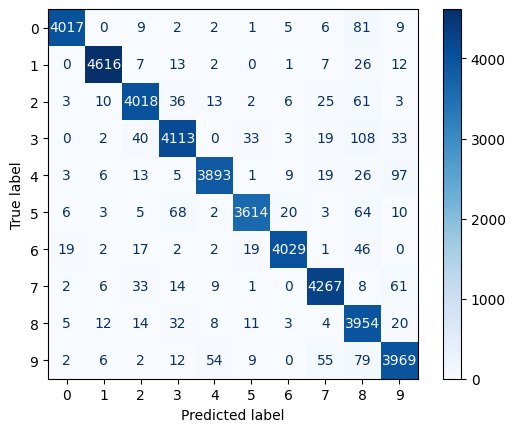

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = nn_model.predict(X_train)
cm = confusion_matrix(Y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

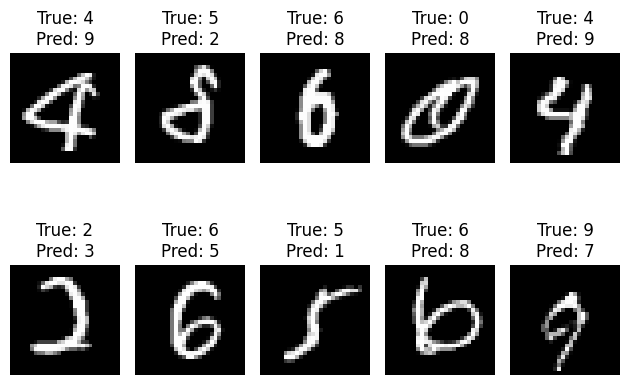

In [20]:
import matplotlib.pyplot as plt

wrong_idx = (y_pred != Y_train.values.ravel())
wrong_images = X_train[wrong_idx].values[:10]
wrong_labels = Y_train[wrong_idx].values.ravel()[:10]
predicted_wrong = y_pred[wrong_idx][:10]

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(wrong_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {wrong_labels[i]}\nPred: {predicted_wrong[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

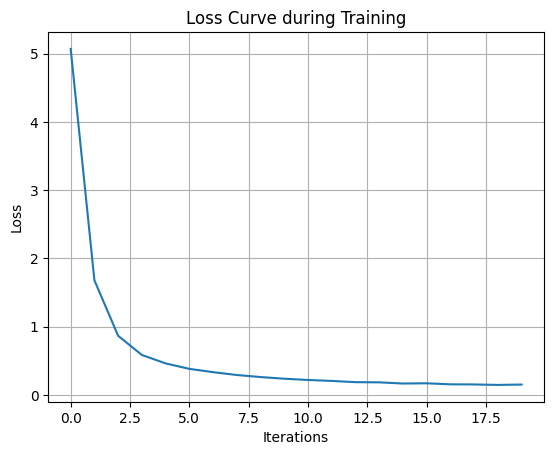

In [21]:
plt.plot(nn_model.loss_curve_)
plt.title("Loss Curve during Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [53]:
import joblib
joblib.dump(nn_model, "mnist_mlp_model.pkl")


['mnist_mlp_model.pkl']

In [54]:
# Load model
model = joblib.load("mnist_mlp_model.pkl")

# Predict on the first test sample
predicted = model.predict(mnist_test.iloc[0:1, :])
print("Predicted digit:", predicted[0])


Predicted digit: 2


In [55]:
from google.colab import files
files.download("mnist_mlp_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load CSVs
train_df = pd.read_csv("dataset_folder/datasets/mnist/train.csv")
test_df = pd.read_csv("dataset_folder/datasets/mnist/test.csv")

# Extract features and labels
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

# Normalize and reshape
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y)

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.7940 - loss: 0.6637 - val_accuracy: 0.9719 - val_loss: 0.0981
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 42s 126ms/step - accuracy: 0.9666 - loss: 0.1048 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9792 - loss: 0.0690 - val_accuracy: 0.9838 - val_loss: 0.0486
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9845 - loss: 0.0516 - val_accuracy: 0.9864 - val_loss: 0.0453
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9864 - val_loss: 0.0421
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9895 - val_loss: 0.0350
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9895 - val_loss: 0.0350
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.9919 - loss: 0.0

In [59]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9884 - loss: 0.0357
Validation Accuracy: 0.9874


In [60]:
model.save("mnist_cnn_model.h5")

In [61]:
from google.colab import files
files.download("mnist_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
model.save("mnist_cnn_model.h5")


In [63]:
model.save("mnist_cnn_model.keras")


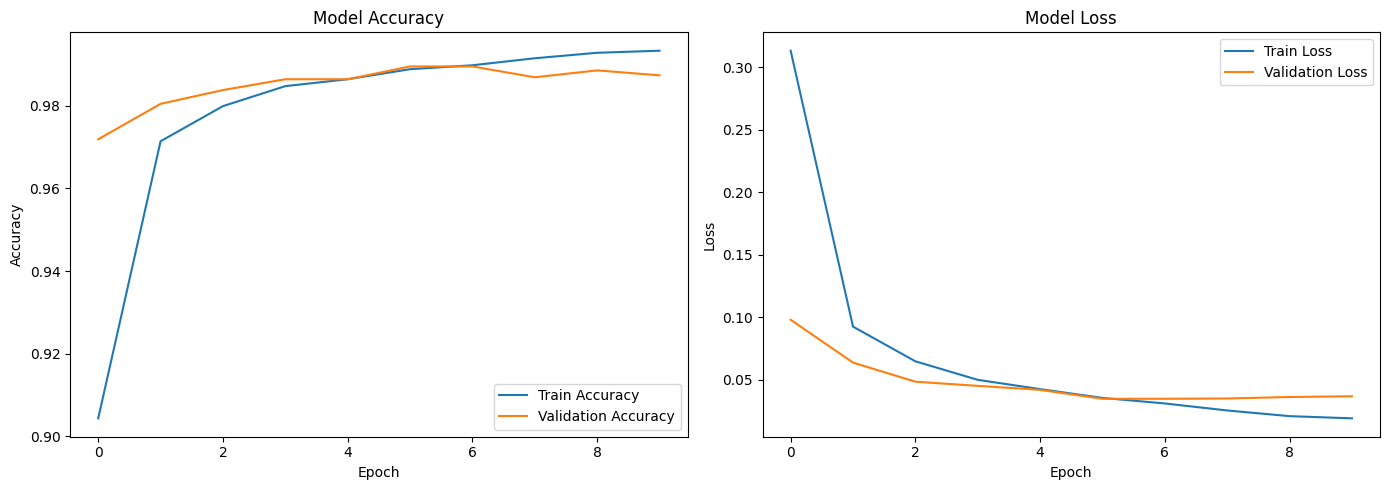

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [67]:
import os
import shutil

# Define folders and paths
project_root = "/mnt/data/MNIST_DeepLearning_Project"
folders = [
    "models", "plots", "notebooks", "scripts", "data", "saved_outputs"
]

# Create the folder structure
for folder in folders:
    os.makedirs(os.path.join(project_root, folder), exist_ok=True)

# Paths to move files (adjust filenames as needed)
files_to_save = {
    "mnist_mlp_model.pkl": "models/mnist_mlp_model.pkl",
    "mnist_cnn_model.h5": "models/mnist_cnn_model.h5",
    "mnist_cnn_model.keras": "models/mnist_cnn_model.keras",
}

# Move files if they exist in current working directory
for src, dest in files_to_save.items():
    src_path = f"/content/{src}"
    dest_path = os.path.join(project_root, dest)
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)

project_root


'/mnt/data/MNIST_DeepLearning_Project'